In [2]:
import pandas as pd

yield_rates1 = pd.read_csv('data/bond-yield/yield-curve-rates-1990-2021.csv')
yield_rates2 = pd.read_csv('data/bond-yield/yield-curve-rates-2022.csv')
yield_rates3 = pd.read_csv('data/bond-yield/yield-curve-rates-2023.csv')

frames = [yield_rates3, yield_rates2, yield_rates1]
yield_rates = pd.concat(frames, ignore_index=True)
# yield_rates

stock_symbol = 'RY.TO'
bank_data = pd.read_csv('data/banks/{}_delta_extremes.csv'.format(stock_symbol), index_col=0)
# bank_data.head()

spread_10_2 = []
spread_10_3 = []

for i in range(len(yield_rates)):
    spread_10_2.append(yield_rates.loc[i]['10 Yr'] - yield_rates.loc[i]['2 Yr'])
    spread_10_3.append(yield_rates.loc[i]['10 Yr'] - yield_rates.loc[i]['3 Mo'])

yield_spread = yield_rates.copy()
yield_spread['spread_10_2'] = spread_10_2
yield_spread['spread_10_3'] = spread_10_3
# yield_spread.head()

yield_dates = pd.to_datetime(yield_spread['Date'])

new_yield = pd.DataFrame({
    'Date' : yield_dates, 
    'spread_10_2': yield_spread['spread_10_2'], 
    'spread_10_3': yield_spread['spread_10_3']
    })
# new_yield.head()

bank_dates = pd.to_datetime(bank_data['Date'])

new_bank = pd.DataFrame({
    'Date': bank_dates,
    'Adj Close': bank_data['Adj Close'],
    'Delta': bank_data['Delta'],
    'Extremes' : bank_data['Extremes']
})
# new_bank.head()

bank_yield = pd.merge(new_yield, new_bank, how='inner')
# bank_yield.head()

bank_yield_copy = bank_yield.copy()
# print(len(bank_yield))
bank_yield_final = bank_yield_copy.dropna().iloc[::-1]
# print(len(bank_yield_final))
# bank_yield_final.head()
df = bank_yield_final.set_index(bank_yield_final['Date'])
df

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes
Date,,,,,,
1995-01-13,1995-01-13,0.30,1.97,2.414120,0.952308,Non-Extreme
1995-01-17,1995-01-17,0.26,1.81,2.425963,-1.370387,Non-Extreme
1995-01-18,1995-01-18,0.23,1.84,2.448739,0.938844,Non-Extreme
1995-01-19,1995-01-19,0.25,1.87,2.463472,0.601657,Non-Extreme
1995-01-20,1995-01-20,0.32,1.91,2.440450,-0.934535,Non-Extreme
...,...,...,...,...,...,...
2023-10-18,2023-10-18,-0.28,-0.70,113.650002,-1.627280,Non-Extreme
2023-10-19,2023-10-19,-0.16,-0.62,113.029999,-0.545537,Non-Extreme
2023-10-20,2023-10-20,-0.14,-0.65,111.010002,-1.787134,Non-Extreme


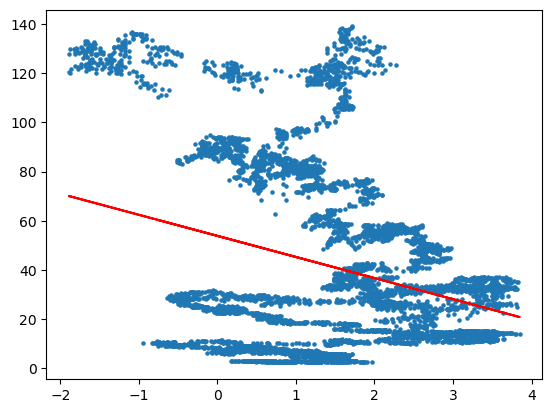

price = 53.88839123614357 + (-8.578156263537458) * spread
Correlation: -0.2793848064145769
R-Squared: 0.07805587005531062


,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Fitted Values
7070,1995-01-13,0.30,1.97,2.414120,0.952308,Non-Extreme,36.989423
7069,1995-01-17,0.26,1.81,2.425963,-1.370387,Non-Extreme,38.361928
7068,1995-01-18,0.23,1.84,2.448739,0.938844,Non-Extreme,38.104584
7067,1995-01-19,0.25,1.87,2.463472,0.601657,Non-Extreme,37.847239
7066,1995-01-20,0.32,1.91,2.440450,-0.934535,Non-Extreme,37.504113
...,...,...,...,...,...,...,...
4,2023-10-18,-0.28,-0.70,113.650002,-1.627280,Non-Extreme,59.893101
3,2023-10-19,-0.16,-0.62,113.029999,-0.545537,Non-Extreme,59.206848
2,2023-10-20,-0.14,-0.65,111.010002,-1.787134,Non-Extreme,59.464193
1,2023-10-23,-0.19,-0.72,111.330002,0.288262,Non-Extreme,60.064664


In [12]:
from scipy import stats
import matplotlib.pyplot as plt

def plot_line(x, y, df):

    slope, intercept, r, p, std_err = stats.linregress(x, y)

    def slr(x): 
        return slope * x + intercept

    my_model = list(map(slr, x)) # fitted values

    plt.scatter(x,y, s=5)
    plt.plot(x, my_model, color = 'red')
    plt.show()

    print('price = {b0} + ({b1}) * spread'.format(b0 = intercept, b1 = slope))
    print('Correlation: {}'.format(x.corr(y)))
    print('R-Squared: {}'.format((x.corr(y))**2))


    fitted_df = df.copy()    
    fitted_df['Fitted Values'] = my_model
    return fitted_df


plot_line(bank_yield_final['spread_10_3'], bank_yield_final['Adj Close'], bank_yield_final)

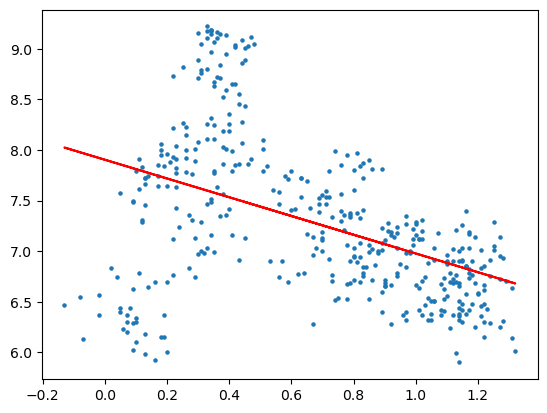

price = 7.903095596531039 + (-0.9263312503846807) * spread
Correlation: -0.45008267924947815
R-Squared: 0.20257441816038863


,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Fitted Values
Date,,,,,,,
1998-06-01,1998-06-01,0.01,0.45,9.011894,-0.056172,Non-Extreme,7.486247
1998-06-02,1998-06-02,0.03,0.48,9.047352,0.393458,Non-Extreme,7.458457
1998-06-03,1998-06-03,0.02,0.44,9.087876,0.447910,Non-Extreme,7.495510
1998-06-04,1998-06-04,0.01,0.47,9.118269,0.334435,Non-Extreme,7.467720
1998-06-05,1998-06-05,0.00,0.46,9.027090,-0.999960,Non-Extreme,7.476983
...,...,...,...,...,...,...,...
2000-01-25,2000-01-25,0.26,1.13,5.995694,1.621622,Non-Extreme,6.856341
2000-01-26,2000-01-26,0.24,1.11,6.245515,4.166674,Positive Extreme,6.874868
2000-01-27,2000-01-27,0.17,1.09,6.734529,7.829843,Positive Extreme,6.893395


In [13]:
tech_bubble = df['1998-06-01':'2000-01-31']
# tech_bubble
plot_line(tech_bubble['spread_10_3'], tech_bubble['Adj Close'], tech_bubble)

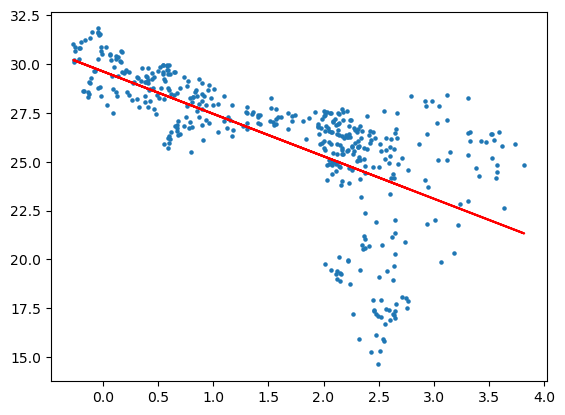

price = 29.62115389695254 + (-2.1698509324859123) * spread
Correlation: -0.6510130629257979
R-Squared: 0.42381800810002884


,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Fitted Values
Date,,,,,,,
2007-05-01,2007-05-01,0.01,-0.26,30.088339,-0.864752,Non-Extreme,30.185315
2007-05-02,2007-05-02,0.00,-0.26,30.209078,0.401282,Non-Extreme,30.185315
2007-05-03,2007-05-03,-0.03,-0.22,30.235331,0.086904,Non-Extreme,30.098521
2007-05-04,2007-05-04,-0.03,-0.25,30.686752,1.493025,Non-Extreme,30.163617
2007-05-07,2007-05-07,-0.04,-0.25,30.896715,0.684214,Non-Extreme,30.163617
...,...,...,...,...,...,...,...
2009-02-23,2009-02-23,1.82,2.49,14.628556,-4.617690,Negative Extreme,24.218225
2009-02-24,2009-02-24,1.77,2.48,16.135603,10.302090,Positive Extreme,24.239924
2009-02-25,2009-02-25,1.86,2.65,16.991108,5.301971,Positive Extreme,23.871049


In [14]:
gfc = df['2007-05-01':'2009-02-27']
# gfc
plot_line(gfc['spread_10_3'],gfc['Adj Close'], gfc)
# gfc.to_csv('{}_gfc.csv'.format(stock_symbol))

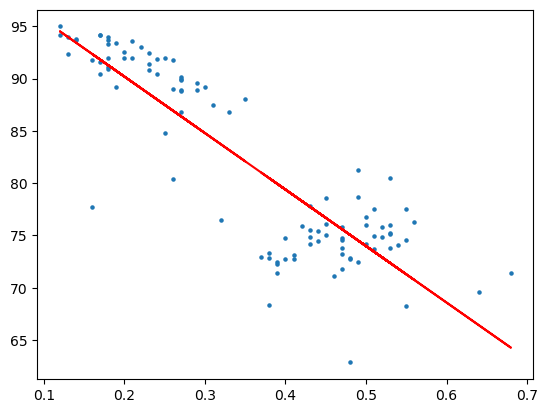

price = 101.00342027238261 + (-54.037747603841545) * spread
Correlation: -0.8690005379062706
R-Squared: 0.7551619348813877
                 Date  spread_10_2  spread_10_3  Adj Close     Delta  \
Date                                                                   
2020-01-02 2020-01-02         0.30         0.34  89.188240  0.778602   
2020-01-03 2020-01-03         0.27         0.28  88.860962 -0.366952   
2020-01-06 2020-01-06         0.27         0.25  88.878174  0.019370   
2020-01-07 2020-01-07         0.29         0.29  88.912628  0.038765   
2020-01-08 2020-01-08         0.29         0.33  89.618912  0.794357   
...               ...          ...          ...        ...       ...   
2020-05-22 2020-05-22         0.49         0.54  72.494934 -1.684973   
2020-05-26 2020-05-26         0.51         0.55  77.570549  6.188201   
2020-05-27 2020-05-27         0.49         0.53  81.289131  4.793806   
2020-05-28 2020-05-28         0.53         0.55  80.478455 -0.997275   
2020-05-29 20

In [6]:
covid_19 = df['2020-01-01':'2020-05-31']
# covid_19
plot_line(covid_19['spread_10_2'], covid_19['Adj Close'], covid_19)

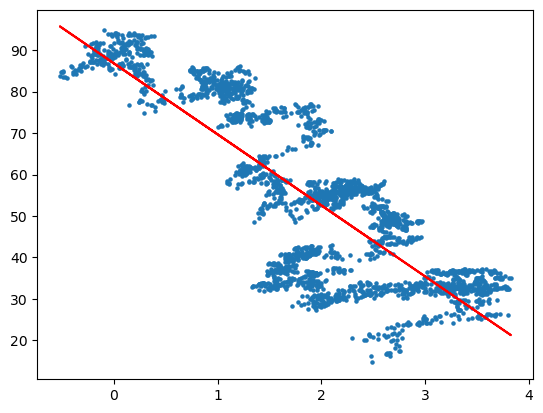

price = 86.82486677750968 + (-17.128931403415173) * spread
Correlation: -0.8177574295912029
R-Squared: 0.6687272136516111


In [15]:
bull_market_09_20 = df['2009-02-23':'2020-02-21']
df_extract = plot_line(bull_market_09_20['spread_10_3'], bull_market_09_20['Adj Close'], bull_market_09_20)
bull_market_09_20
df_extract.to_csv('{}_bull_market_09_20.csv'.format(stock_symbol))

In [11]:
bull_market_09_20

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes
Date,,,,,,
2009-02-23,2009-02-23,1.82,2.49,14.628556,-4.617690,Negative Extreme
2009-02-24,2009-02-24,1.77,2.48,16.135603,10.302090,Positive Extreme
2009-02-25,2009-02-25,1.86,2.65,16.991108,5.301971,Positive Extreme
2009-02-26,2009-02-26,1.90,2.71,18.073244,6.368837,Positive Extreme
2009-02-27,2009-02-27,2.02,2.76,17.518003,-3.072171,Negative Extreme
...,...,...,...,...,...,...
2020-02-14,2020-02-14,0.17,0.01,94.201195,-0.009216,Non-Extreme
2020-02-18,2020-02-18,0.14,-0.03,93.809769,-0.415521,Non-Extreme
2020-02-19,2020-02-19,0.14,-0.02,93.731491,-0.083443,Non-Extreme


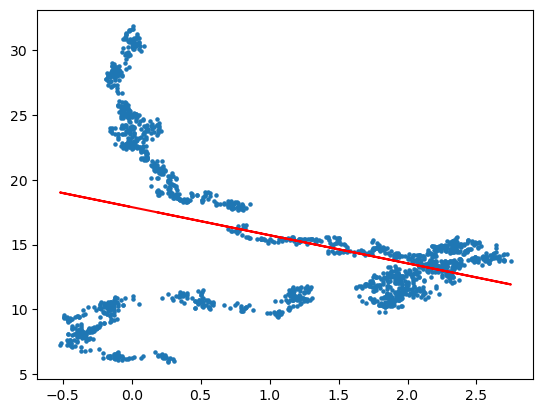

price = 17.886591107301122 + (-2.1699271097674986) * spread
Correlation: -0.3586095054817898
R-Squared: 0.12860077742189385
                 Date  spread_10_2  spread_10_3  Adj Close     Delta  \
Date                                                                   
2000-01-04 2000-01-04         0.19         1.06   6.503633 -2.755971   
2000-01-05 2000-01-05         0.24         1.18   6.477303 -0.404851   
2000-01-06 2000-01-06         0.22         1.16   6.572095  1.463449   
2000-01-07 2000-01-07         0.21         1.14   6.508899 -0.961581   
2000-01-10 2000-01-10         0.19         1.15   6.414113 -1.456252   
...               ...          ...          ...        ...       ...   
2007-05-24 2007-05-24         0.01        -0.05  31.820581  0.530648   
2007-05-25 2007-05-25         0.01        -0.02  30.880966 -2.952853   
2007-05-29 2007-05-29         0.00        -0.02  30.676250 -1.033028   
2007-05-30 2007-05-30        -0.01         0.03  30.880966  0.667344   
2007-05-31 2

In [8]:
bull_market_00_07 = df['2000-01-01':'2007-05-31']
# bull_market_00_07
plot_line(bull_market_00_07['spread_10_2'], bull_market_00_07['Adj Close'], bull_market_00_07)

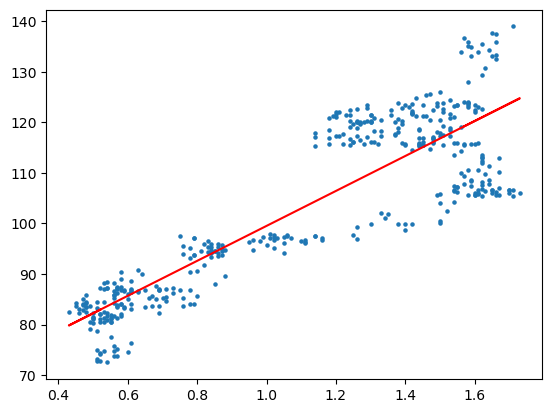

price = 64.95187093279725 + (34.56274571845853) * spread
Correlation: 0.8724280829119737
R-Squared: 0.7611307598534617
                 Date  spread_10_2  spread_10_3   Adj Close     Delta  \
Date                                                                    
2020-05-01 2020-05-01         0.44         0.52   74.442352 -1.342976   
2020-05-04 2020-05-04         0.45         0.51   75.023903  0.781210   
2020-05-05 2020-05-05         0.47         0.53   74.794807 -0.305364   
2020-05-06 2020-05-06         0.55         0.60   74.565720 -0.306287   
2020-05-07 2020-05-07         0.50         0.52   74.177994 -0.519979   
...               ...          ...          ...         ...       ...   
2022-01-25 2022-01-25         0.76         1.59  133.084702 -0.647240   
2022-01-26 2022-01-26         0.72         1.66  133.310883  0.169953   
2022-01-27 2022-01-27         0.63         1.61  133.942276  0.473624   
2022-01-28 2022-01-28         0.63         1.59  134.931763  0.738741   
2022-

In [9]:
bull_market_20_22 = df['2020-05-01':'2022-01-31']
# bull_market_20_22
plot_line(bull_market_20_22['spread_10_3'], bull_market_20_22['Adj Close'], bull_market_20_22)